In [135]:
# basic
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale = 1)
import matplotlib.pyplot as plt # graph

# importing sklearn datasets 
from sklearn import datasets 

# data pre-processing
from sklearn.preprocessing import StandardScaler # 연속변수 표준화 // scaler standardization (평균0 표편1)
from sklearn.preprocessing import LabelEncoder # 범주형(categorical) 변수 숫자형(Numerical)으로 변환해주는 package

# split train/test data 
from sklearn.model_selection import train_test_split # data split (train/test)

# classfication model 
from sklearn.naive_bayes import GaussianNB # 나이브 베이즈 분류
from sklearn.tree import DecisionTreeClassifier # 의사결정나무
from sklearn.ensemble import RandomForestClassifier # 랜덤 포레스트
from sklearn.ensemble import BaggingClassifier # 앙상블
from sklearn.linear_model import Perceptron # 퍼셉트론
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀분석
from sklearn.svm import SVC # 서포트 벡터머신
from sklearn.neural_network import MLPClassifier # 다층 인공신경망

# model test
from sklearn.metrics import confusion_matrix, classification_report # 정오분류
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer # 정확,예측,민감,f1스코어들
from sklearn.metrics import roc_curve # drawing ROC curve 

# optimization
from sklearn.model_selection import cross_validate # 교차타당성 
from sklearn.pipeline import make_pipeline # 파이프라인 구축 (scaler/classfication 한번에)
from sklearn.model_selection import learning_curve, validation_curve # (학습/검증 곡선)
from sklearn.model_selection import GridSearchCV # hyperparameter optimization

In [136]:
import glob
df = glob.glob('*csv*')
rm_df = pd.read_csv(df[0])
rm_df.tail()


,Income,Lot_Size,Ownership
43,68.0,18.4,Nonowner
44,49.4,16.4,Nonowner
45,35.0,18.8,Nonowner
46,53.0,14.0,Nonowner
47,65.0,14.8,Nonowner


In [137]:
rm_df.describe()

,Income,Lot_Size
count,48.000000,48.000000
mean,68.604167,18.950000
std,19.657828,2.402304
min,33.000000,14.000000
25%,52.950000,17.500000
50%,64.800000,19.000000
75%,83.125000,20.800000
max,112.100000,23.600000


In [138]:
rm_df.keys()

Index(['Income', 'Lot_Size', 'Ownership'], dtype='object')

In [139]:
X = rm_df.iloc[:,:2]
# X = rm_df.drop(['Ownership'],axis=1)
X.head()

y = rm_df.iloc[:,2]
y.head()

0    Owner
1    Owner
2    Owner
3    Owner
4    Owner
Name: Ownership, dtype: object

In [140]:
LE = LabelEncoder()
y_le = LE.fit_transform(y)
print(y_le)
# transform된 class 확인 방법
print(LE.classes_) # Nonowner : 0 , Owner : 1 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
['Nonowner' 'Owner']


In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
# split 옵션
#  test_size비율 : 30%
#  random_seed : 1로 지정
#  stratify : y의 비율에 따라 분할

In [142]:
y_train.describe()

count           33
unique           2
top       Nonowner
freq            17
Name: Ownership, dtype: object

In [143]:
# model selection & construction
tree = DecisionTreeClassifier(criterion='gini',max_depth=1,random_state=1)
# criterion='gini',
# max_depth=1,
# random_state=1

# Model train
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=1)

In [144]:
# model validation
# model prediction value
y_pred = tree.predict(X_test)
y_pred

array(['Owner', 'Owner', 'Nonowner', 'Owner', 'Owner', 'Nonowner',
       'Owner', 'Nonowner', 'Nonowner', 'Owner', 'Nonowner', 'Owner',
       'Nonowner', 'Nonowner', 'Nonowner'], dtype=object)

In [145]:
# real value
np.array(y_test)

array(['Owner', 'Owner', 'Owner', 'Nonowner', 'Owner', 'Nonowner',
       'Owner', 'Nonowner', 'Owner', 'Owner', 'Nonowner', 'Nonowner',
       'Owner', 'Nonowner', 'Nonowner'], dtype=object)

In [146]:

# 예측 확률값
y_pred_p = tree.predict_proba(X_test)
y_pred_p

array([[0.23529412, 0.76470588],
       [0.23529412, 0.76470588],
       [0.8125    , 0.1875    ],
       [0.23529412, 0.76470588],
       [0.23529412, 0.76470588],
       [0.8125    , 0.1875    ],
       [0.23529412, 0.76470588],
       [0.8125    , 0.1875    ],
       [0.8125    , 0.1875    ],
       [0.23529412, 0.76470588],
       [0.8125    , 0.1875    ],
       [0.23529412, 0.76470588],
       [0.8125    , 0.1875    ],
       [0.8125    , 0.1875    ],
       [0.8125    , 0.1875    ]])

In [147]:
# confusion matrix : making dataframe
c_m = pd.DataFrame(confusion_matrix(y_test,y_pred),index=['True[Nonowner]','True[Owner]'],columns=['Pred[Nonowner]','Pred[Owner]'])
c_m

# classfication Report
print("classification_report\n\n",classification_report(y_test,y_pred))

classification_report

               precision    recall  f1-score   support

    Nonowner       0.62      0.71      0.67         7
       Owner       0.71      0.62      0.67         8

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.67        15
weighted avg       0.67      0.67      0.67        15



In [149]:
print('error : %d' %(y_test != y_pred).sum())   
print('Accuracy_score : %0.3f' %accuracy_score(y_test,y_pred))
# the following three scores should be based on the label (target selection = positive)
print('Owner precision_score : %0.3f'%precision_score(y_test,y_pred,pos_label='Owner'))
print('Owner recall_score : %0.3f'%recall_score(y_test,y_pred,pos_label='Owner'))
print('Owner f1_score : %.3f'% f1_score(y_test,y_pred,pos_label='Owner'))

error : 5
Accuracy_score : 0.667
Owner precision_score : 0.714
Owner recall_score : 0.625
Owner f1_score : 0.667


<AxesSubplot:>

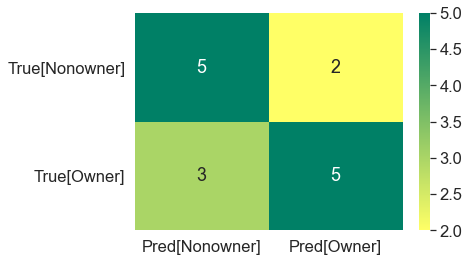

In [150]:
# Express heatmap with seaborn 
sns.set(font_scale = 1.5)
sns.heatmap(c_m, annot=True, cmap='summer_r')

In [162]:
# drawing the ROC Curve
# if yo can available decision_function
    # y_score = tree.decision_function(X_test)
# when the decision_function is not available
# owner에 대한

fpr,tpr,thresholds = roc_curve(y_test,tree.predict_proba(X_test)[:,1], pos_label = {0,1})
print(fpr,"\n",tpr,"\n",thresholds)


[0.         0.46666667 1.        ] 
 [nan nan nan] 
 [1.76470588 0.76470588 0.1875    ]


C:\Users\amj41\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "
